In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Daylio_Abid.csv", sep=",")

In [3]:
df

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful
...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful


# I . Data Preparation:

*Describe your dataset:*

In [4]:
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


In [5]:
print(df.shape)

(940, 7)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_date   940 non-null    object
 1   date        940 non-null    object
 2   weekday     940 non-null    object
 3   time        940 non-null    object
 4   sub_mood    940 non-null    object
 5   activities  893 non-null    object
 6   mood        940 non-null    object
dtypes: object(7)
memory usage: 51.5+ KB


In [7]:
df.describe(include = 'all')

,full_date,date,weekday,time,sub_mood,activities,mood
count,940,940,940,940,940,893,940
unique,775,366,7,425,22,839,5
top,02/05/2018,Mar-01,Wednesday,9:00 pm,blessed,Dota 2 | streaming | youtube,Good
freq,4,7,139,65,174,10,487


In [8]:
df.mood.value_counts()

Good       487
Normal     186
Amazing    167
Awful       51
Bad         49
Name: mood, dtype: int64

In [9]:
df.weekday.value_counts()

Wednesday    139
Tuesday      139
Sunday       135
Monday       134
Thursday     131
Saturday     131
Friday       131
Name: weekday, dtype: int64

In [10]:
df.sub_mood.value_counts()

blessed           174
focused           111
yolo              100
excited            91
wondering          64
confused           64
hungry             53
Cool               37
over the moon      34
weak               31
Chill              30
worried            28
meh                27
good               19
triggered          18
angry              16
sad af             13
scared              9
sick                8
happiest day        5
awful               4
bad                 4
Name: sub_mood, dtype: int64

In [11]:
df["mood"].value_counts()

Good       487
Normal     186
Amazing    167
Awful       51
Bad         49
Name: mood, dtype: int64

*Preprocess your data:*

In [12]:
df

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful
...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful


In [13]:
df.shape

(940, 7)

In [14]:
df.isnull().sum()

full_date      0
date           0
weekday        0
time           0
sub_mood       0
activities    47
mood           0
dtype: int64

In [15]:
df['activities'].values

array(['reading | Art | prayer | fasting  | walk | meditation  | shower | writing | Watching series  | good meal | reddit | language learning  | streaming  | youtube | cooking | travel | cleaning | new things  | power nap | Documentary  | penpal | coding ',
       'reading | learning  | Art | prayer | fasting  | walk | meditation  | shower | Audio books  | writing | Watching series  | good meal | reddit | language learning  | shave  | streaming  | youtube | cooking | cleaning | research  | new things  | power nap | repair | Documentary  | penpal | coding  | Tutorial ',
       'reading | learning  | prayer | fasting  | Quran  | walk | meditation  | shower | podcast | Audio books  | writing | Watching series  | good meal | reddit | language learning  | streaming  | youtube | cooking | research  | new things  | designing  | repair | Documentary  | penpal | coding  | Tutorial ',
       'reading | learning  | Art | prayer | fasting  | walk | meditation  | Audio books  | writing | Watching s

In [16]:
a = [[w.strip().lower() for w in word.split('|')]
     for word in df['activities'].astype(str)]
print(a)

[['reading', 'art', 'prayer', 'fasting', 'walk', 'meditation', 'shower', 'writing', 'watching series', 'good meal', 'reddit', 'language learning', 'streaming', 'youtube', 'cooking', 'travel', 'cleaning', 'new things', 'power nap', 'documentary', 'penpal', 'coding'], ['reading', 'learning', 'art', 'prayer', 'fasting', 'walk', 'meditation', 'shower', 'audio books', 'writing', 'watching series', 'good meal', 'reddit', 'language learning', 'shave', 'streaming', 'youtube', 'cooking', 'cleaning', 'research', 'new things', 'power nap', 'repair', 'documentary', 'penpal', 'coding', 'tutorial'], ['reading', 'learning', 'prayer', 'fasting', 'quran', 'walk', 'meditation', 'shower', 'podcast', 'audio books', 'writing', 'watching series', 'good meal', 'reddit', 'language learning', 'streaming', 'youtube', 'cooking', 'research', 'new things', 'designing', 'repair', 'documentary', 'penpal', 'coding', 'tutorial'], ['reading', 'learning', 'art', 'prayer', 'fasting', 'walk', 'meditation', 'audio books', 

In [17]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(a).transform(a)    #Apply one-hot-encoding on our dataset
p=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array

p

,art,audio books,cleaning,coding,cooking,designing,documentary,dota 2,email,exercise,...,trimming,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube
0,True,False,True,True,True,False,True,False,False,False,...,False,False,False,True,True,False,False,True,False,True
1,True,True,True,True,True,False,True,False,False,False,...,False,True,False,True,True,False,False,True,False,True
2,False,True,False,True,True,True,True,False,False,False,...,False,True,False,True,True,False,False,True,False,True
3,True,True,False,True,True,False,True,False,False,False,...,False,True,False,True,True,False,False,True,False,True
4,False,False,True,True,True,False,True,False,False,False,...,False,True,False,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
938,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [18]:
df[p.columns] = p
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood,art,audio books,cleaning,...,trimming,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,True,False,True,...,False,False,False,True,True,False,False,True,False,True
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,True,True,True,...,False,True,False,True,True,False,False,True,False,True
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,False,True,False,...,False,True,False,True,True,False,False,True,False,True
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,True,True,False,...,False,True,False,True,True,False,False,True,False,True
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,False,False,True,...,False,True,False,True,True,False,False,True,False,True


In [19]:
from sklearn.preprocessing import LabelEncoder
p.columns_le = LabelEncoder()
for col in p.columns:
    df[col] =p.columns_le.fit_transform(df[col])
df

,full_date,date,weekday,time,sub_mood,activities,mood,art,audio books,cleaning,...,trimming,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1,0,1,...,0,0,0,1,1,0,0,1,0,1
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1,1,1,...,0,1,0,1,1,0,0,1,0,1
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,0,1,0,...,0,1,0,1,1,0,0,1,0,1
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1,1,0,...,0,1,0,1,1,0,0,1,0,1
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,0,0,1,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good,0,1,0,...,0,0,0,1,0,0,1,0,0,1
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal,0,0,0,...,0,0,0,0,0,0,0,0,0,1
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good,0,0,0,...,0,0,0,0,0,0,0,0,0,1
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
from sklearn.preprocessing import LabelEncoder
mood_le = LabelEncoder()
df["mood"] = mood_le.fit_transform(df["mood"])
weekday_le = LabelEncoder()
df["weekday"] = weekday_le.fit_transform(df["weekday"])

In [21]:
if 'full_date' in df.columns: 
    df.drop('full_date', axis=1, inplace=True)
if 'date' in df.columns: 
    df.drop('date', axis=1, inplace=True)
if 'time' in df.columns: 
    df.drop('time', axis=1, inplace=True)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

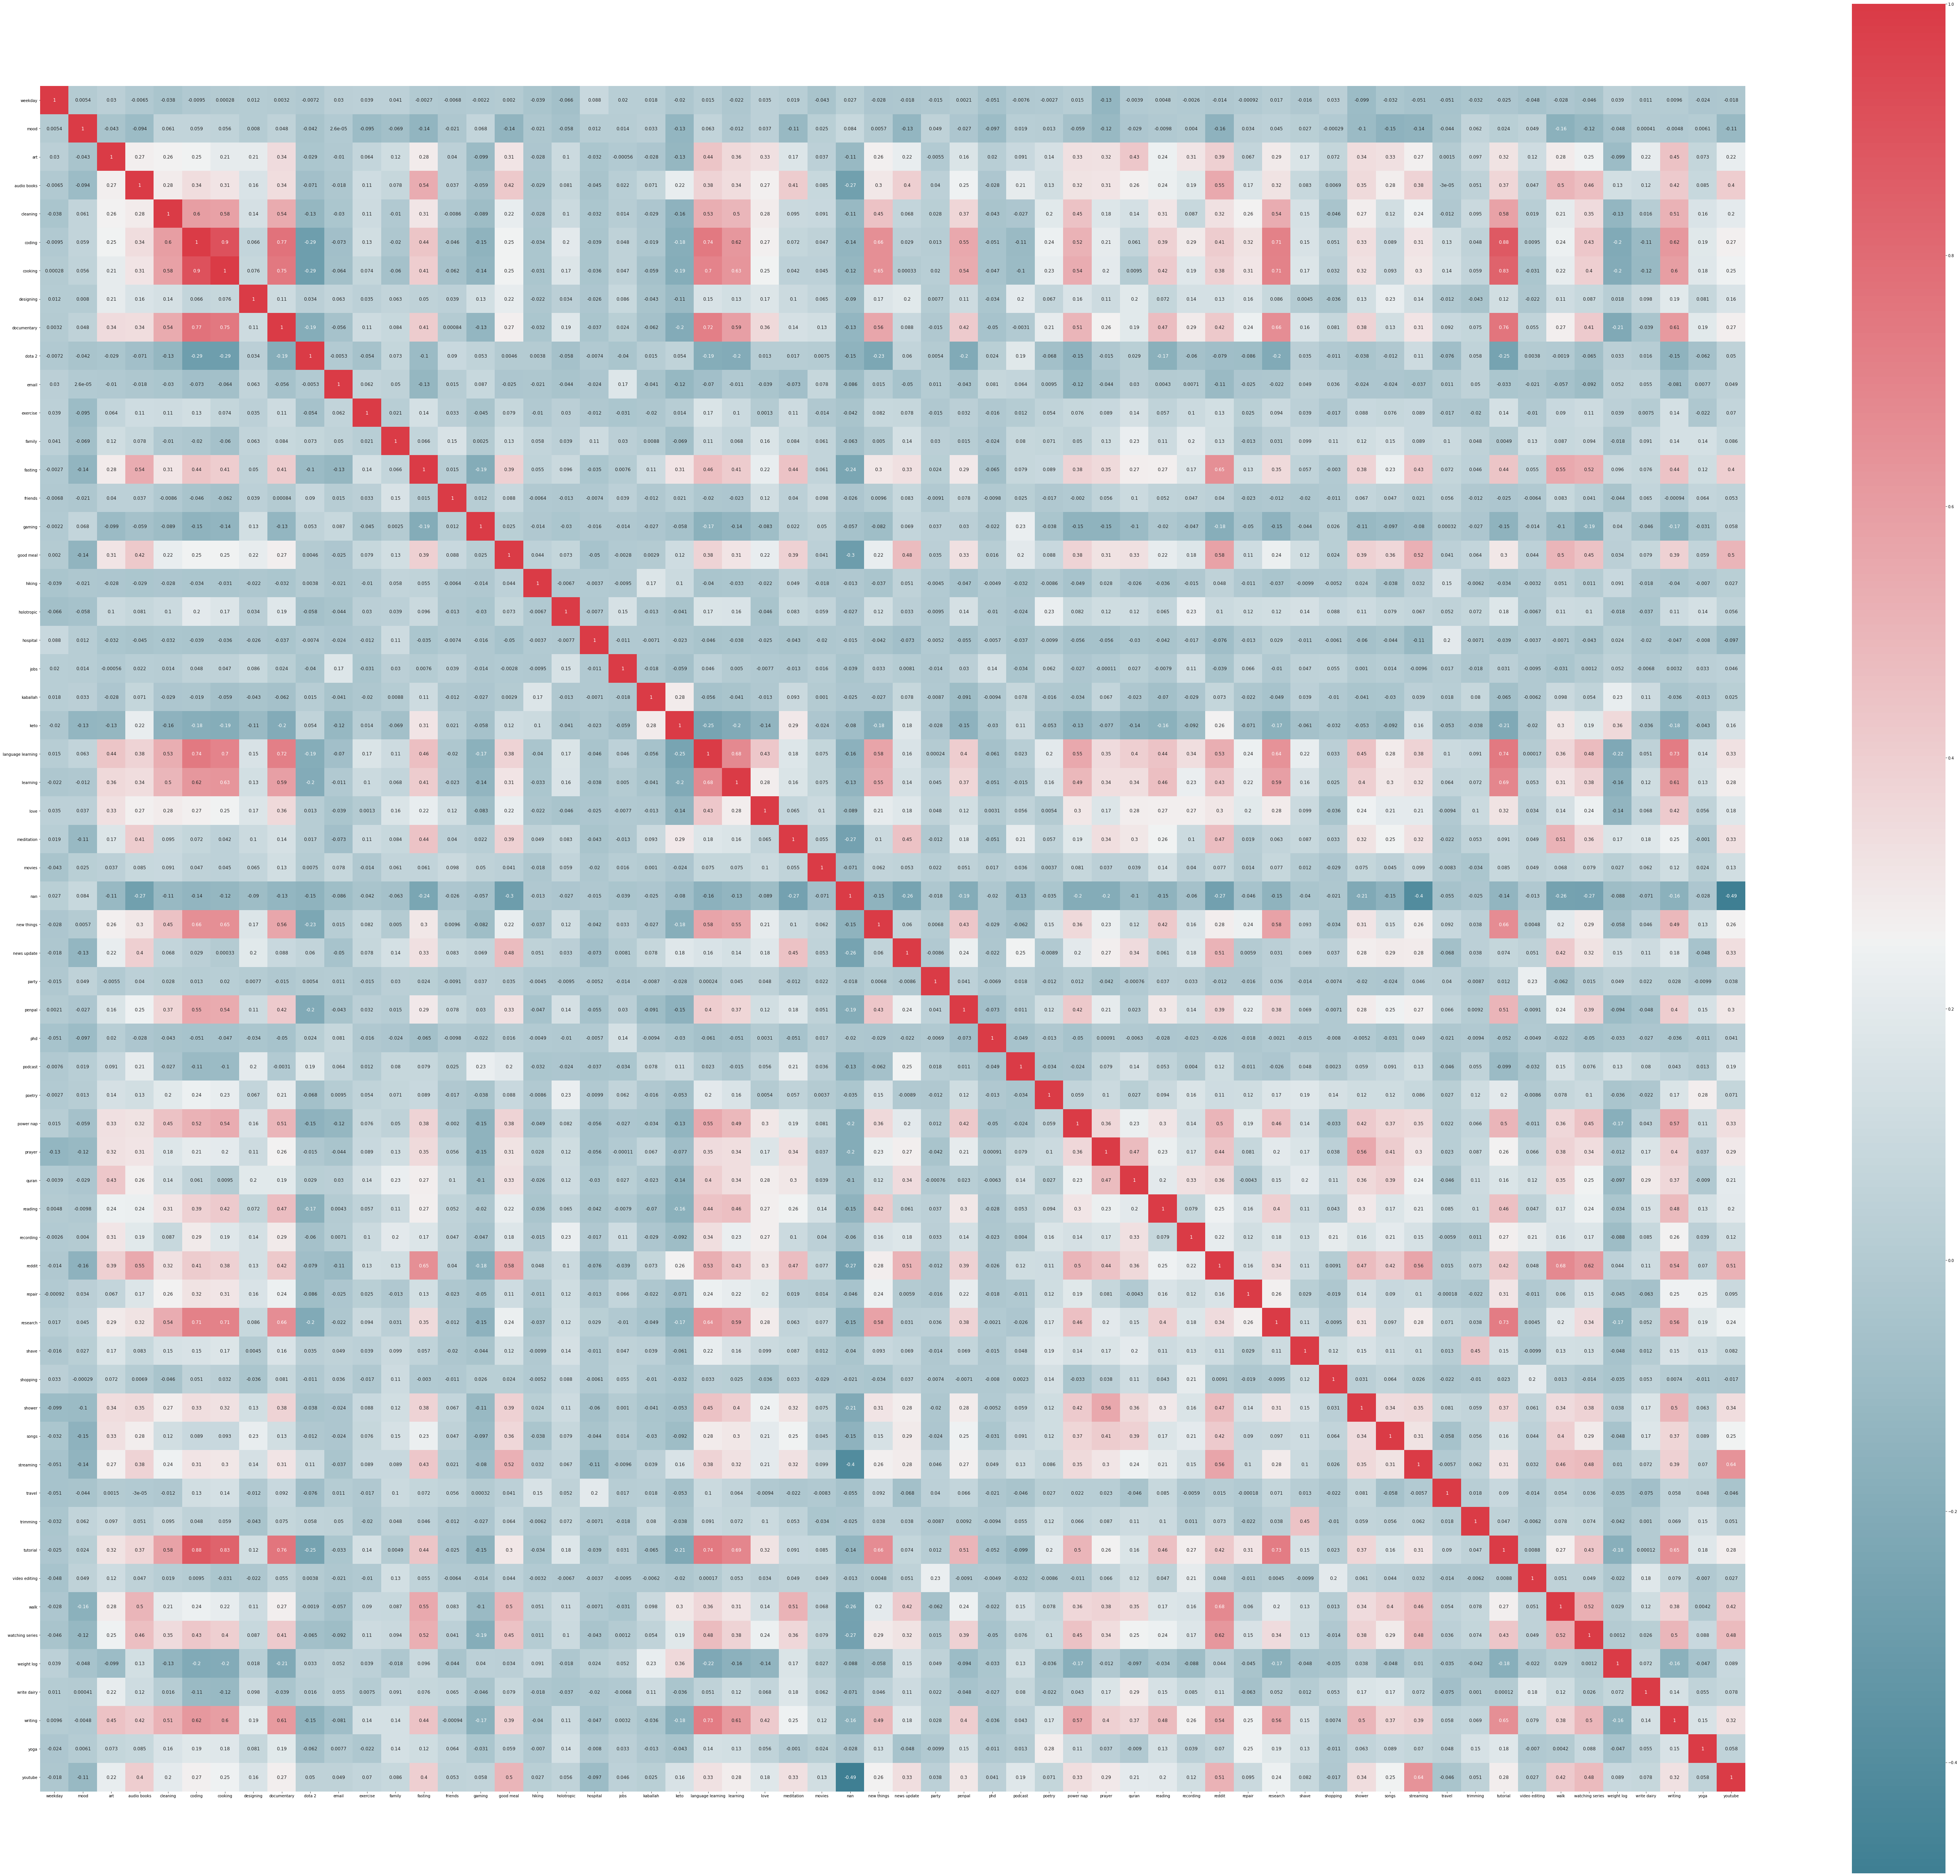

In [23]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 100 , 100 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

    
plot_correlation_map( df )


# II . Data Visualization:

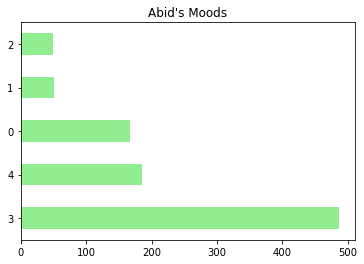

In [24]:
df["mood"].value_counts()[:15].plot.barh(color='lightgreen', title="Abid's Moods");

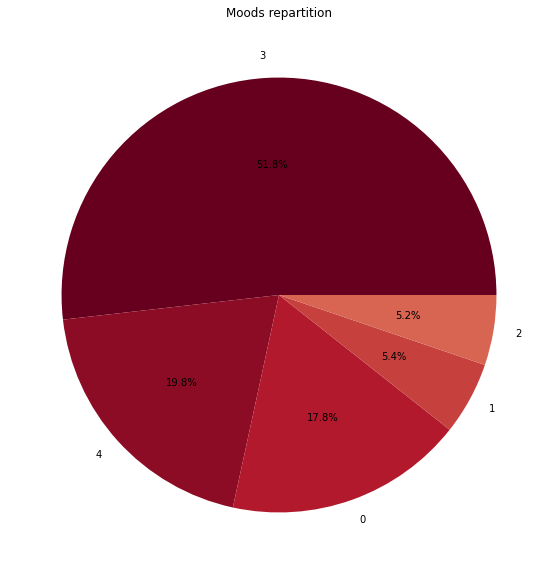

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
color = plt.cm.RdBu(np.linspace(0,1,20))
df["mood"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Moods repartition")
plt.axis("off")
plt.show()

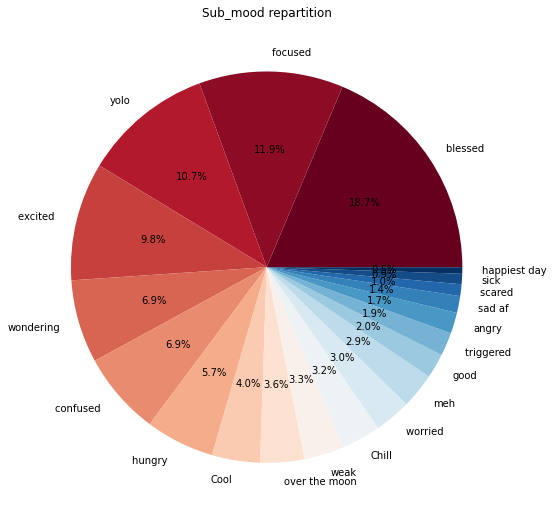

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
color = plt.cm.RdBu(np.linspace(0,1,20))
df["sub_mood"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Sub_mood repartition")
plt.axis("off")
plt.show()

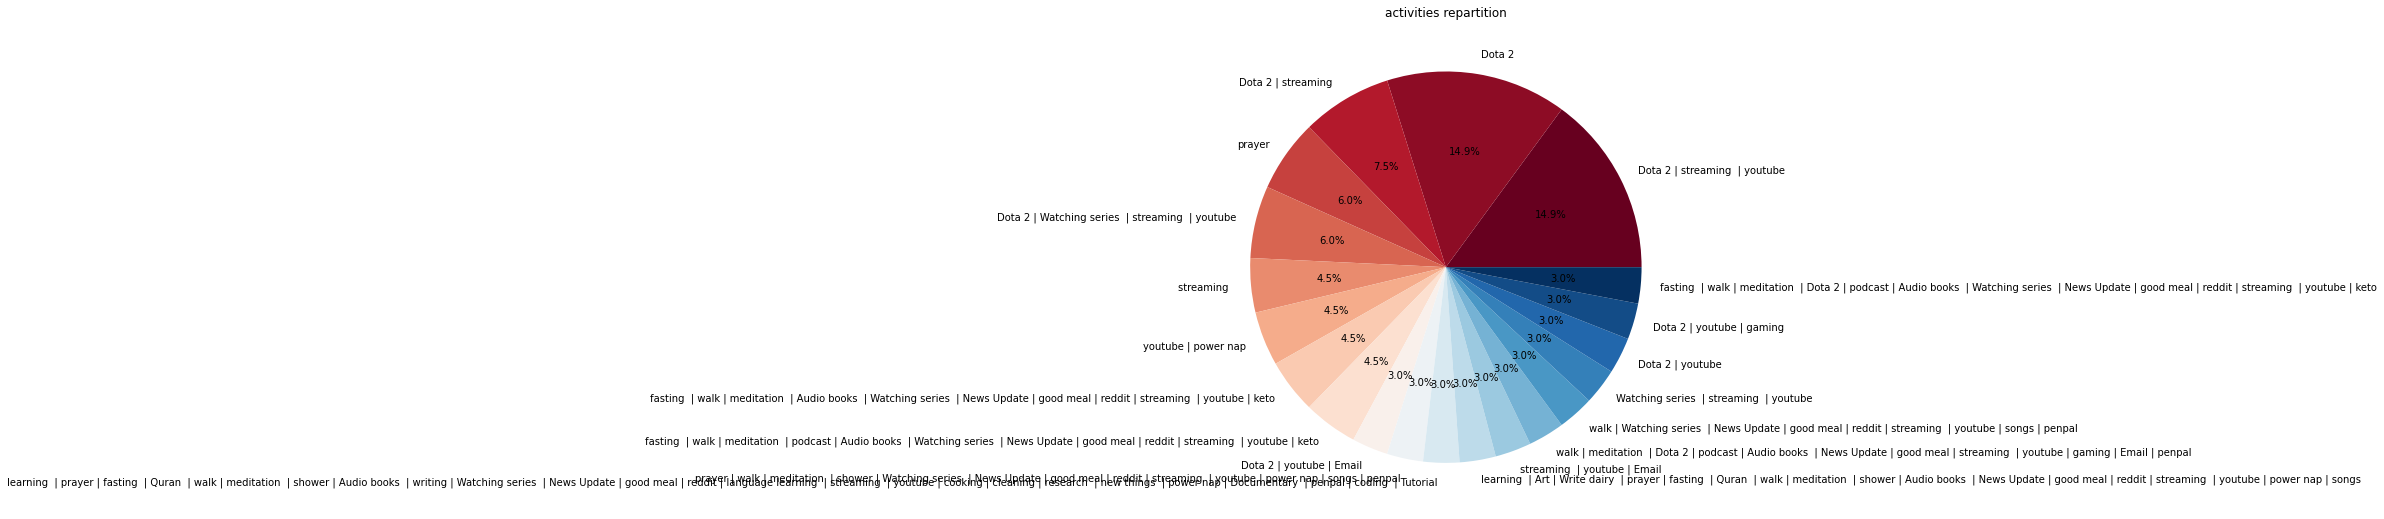

In [27]:

fig, ax = plt.subplots(figsize=(9,9))
color = plt.cm.RdBu(np.linspace(0,1,20))
df["activities"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("activities repartition")
plt.axis("off")
plt.show()

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='weekday', ylabel='mood'>

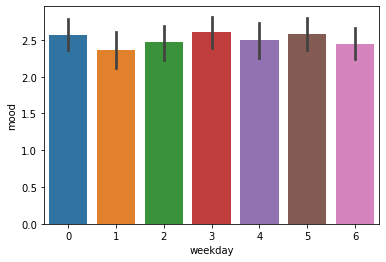

In [29]:
sns.barplot(x=df['weekday'],y=df['mood'])

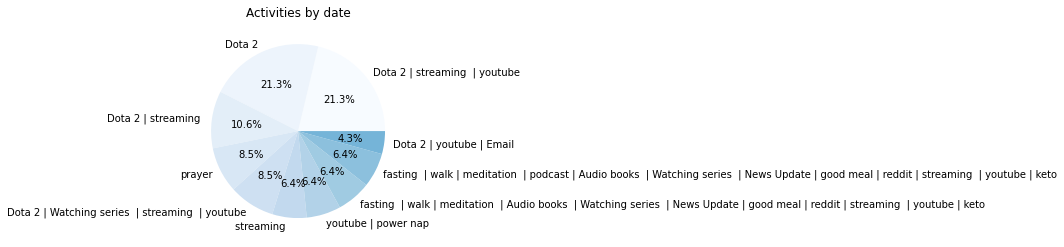

In [30]:
color = plt.cm.Blues(np.linspace(0,1,20))
df["activities"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Activities by date")
plt.axis("off")
plt.show()

# III . Choosing the right algorithm:

In [31]:
df.dropna(thresh=10)

,weekday,sub_mood,activities,mood,art,audio books,cleaning,coding,cooking,designing,...,trimming,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube
0,0,yolo,reading | Art | prayer | fasting | walk | med...,3,1,0,1,1,1,0,...,0,0,0,1,1,0,0,1,0,1
1,4,focused,reading | learning | Art | prayer | fasting ...,3,1,1,1,1,1,0,...,0,1,0,1,1,0,0,1,0,1
2,6,confused,reading | learning | prayer | fasting | Qura...,4,0,1,0,1,1,1,...,0,1,0,1,1,0,0,1,0,1
3,5,wondering,reading | learning | Art | prayer | fasting ...,4,1,1,0,1,1,0,...,0,1,0,1,1,0,0,1,0,1
4,1,angry,reading | learning | fasting | walk | medita...,1,0,0,1,1,1,0,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,3,yolo,Write dairy | walk | meditation | Audio book...,3,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
936,3,meh,meditation | youtube | research,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
937,3,blessed,prayer | good meal | youtube | movies,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
938,2,angry,Write dairy | Dota 2 | streaming | shopping,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
sub_mood_le = LabelEncoder()
df["sub_mood"] = sub_mood_le.fit_transform(df["sub_mood"])

In [33]:
activities_le = LabelEncoder()
df["actvities"] = activities_le.fit_transform(df["activities"])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [58]:
x = df.loc[:, df.columns !='activities']
y = df['activities']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

logreg = LogisticRegression() 
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test) 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print("Roc Auc score :", roc_auc_score(y_test, y_pred))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy=0.00


NameError: name 'roc_auc_score' is not defined

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

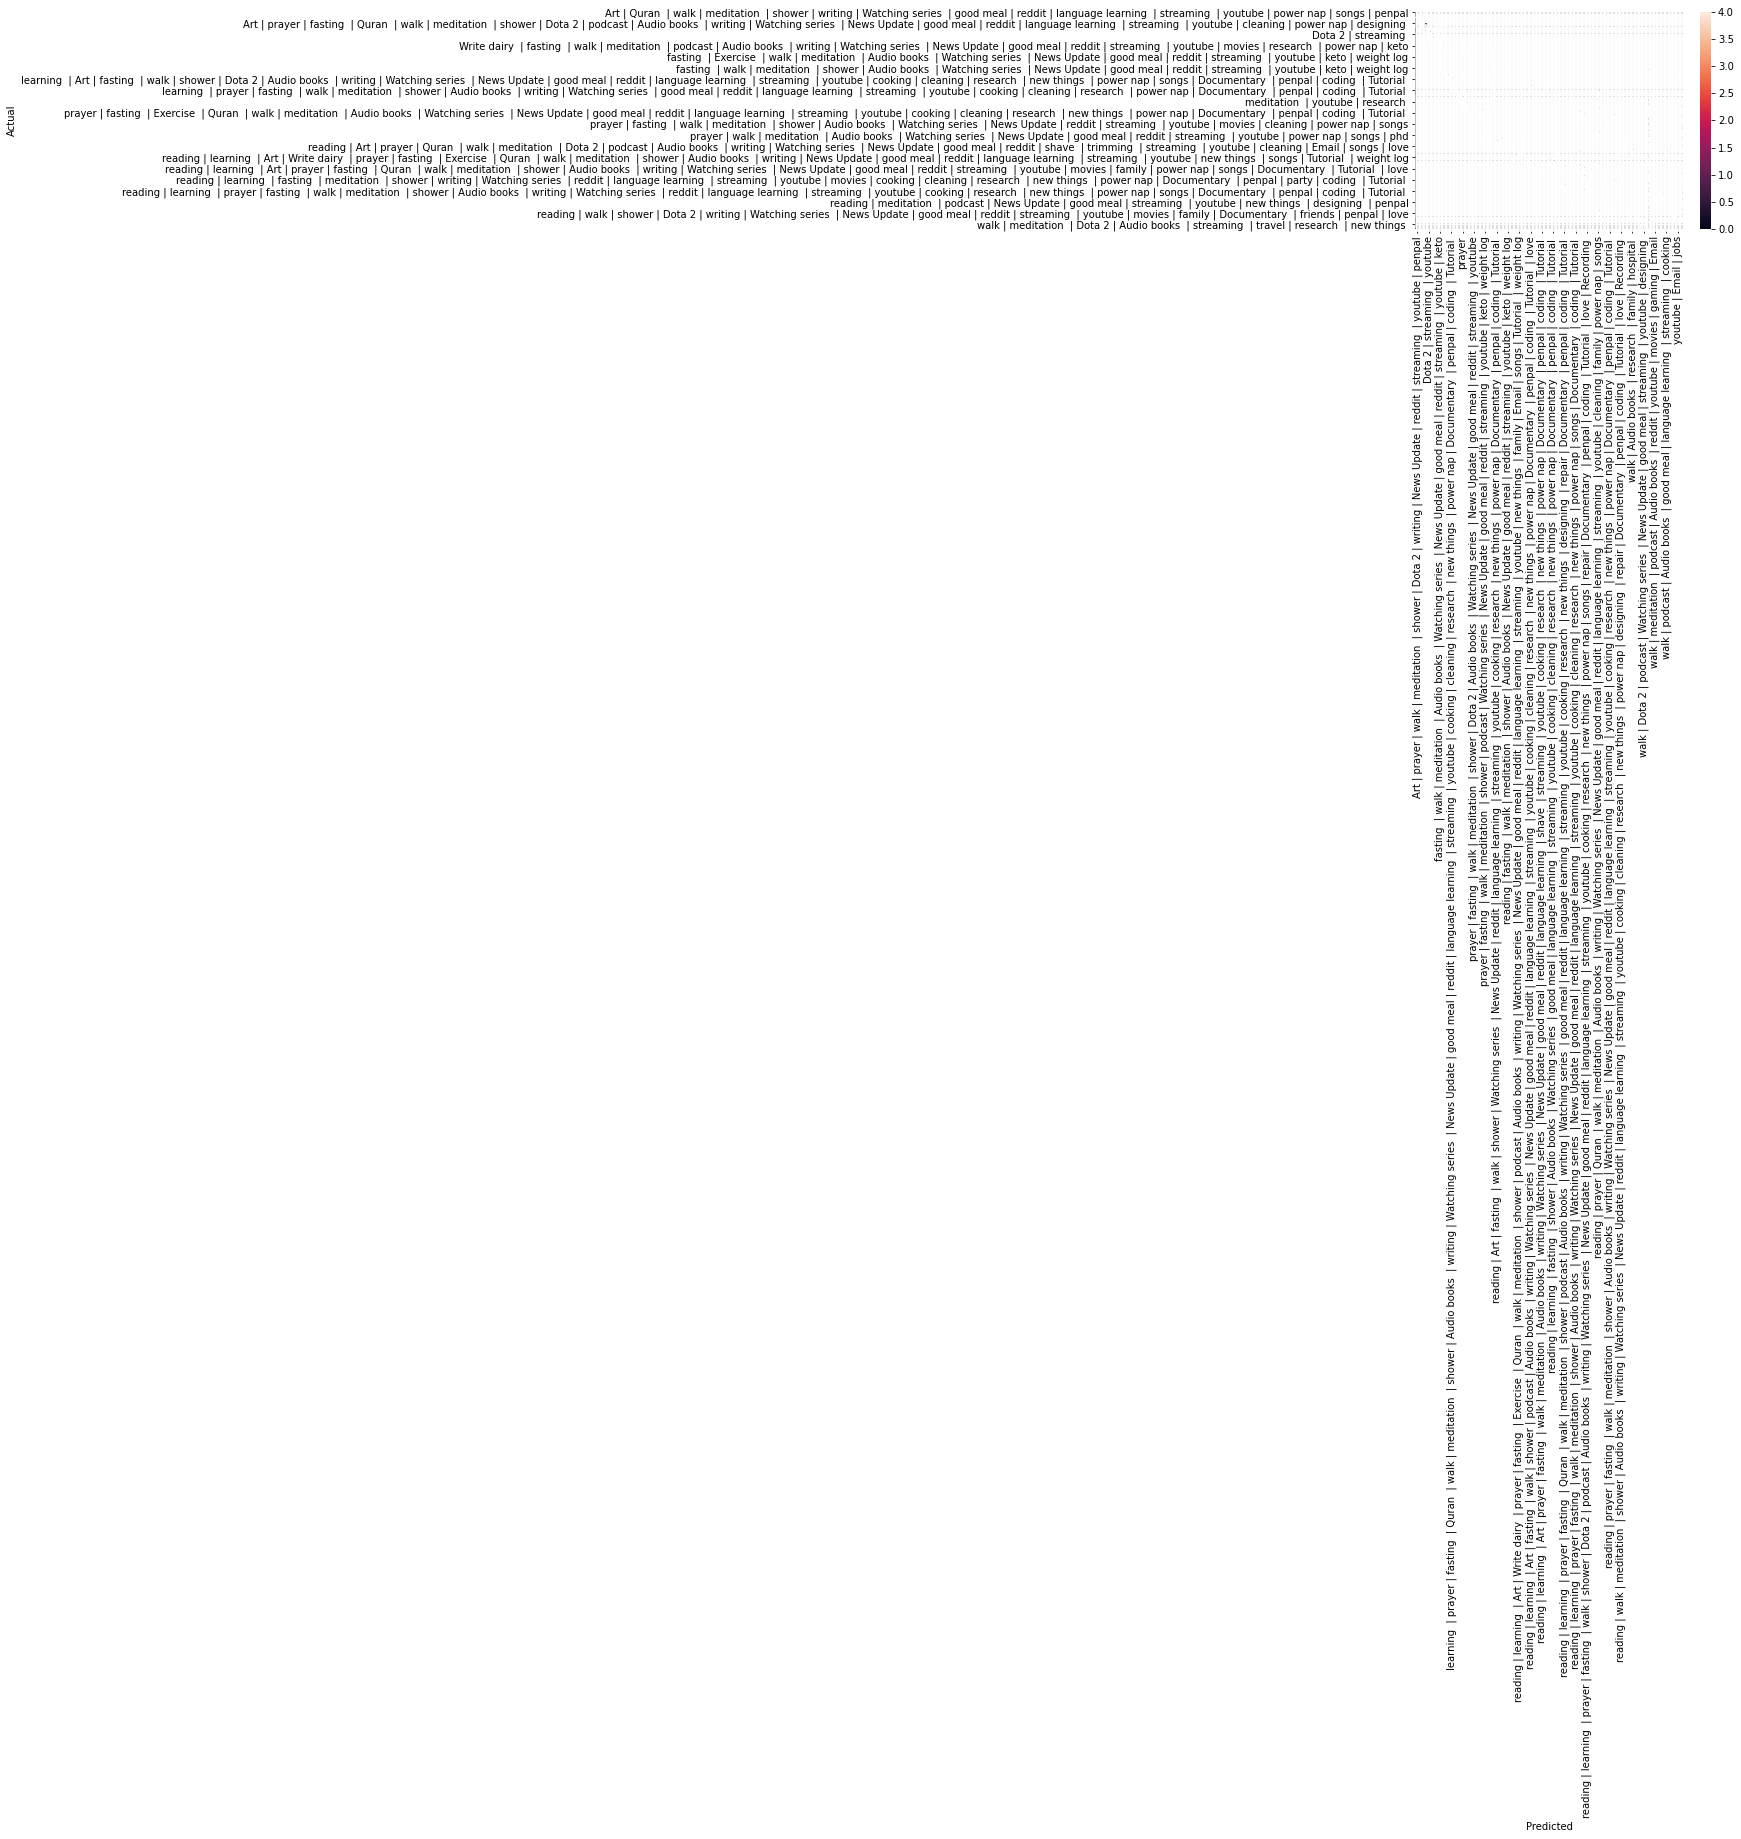

In [59]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)